**WINE QUALITY**

**1. SETUP:**

Imports and settings needed to eject the notebook from any machine

In [ ]:
import pandas as pd
import numpy as np
import matplotlib as mpl
import matplotlib.pyplot as plt
%matplotlib inline
import seaborn as sns
import scipy.stats as st
import plotly.graph_objects as go
import missingno as msno

from sklearn import preprocessing
from sklearn.metrics import f1_score, confusion_matrix,accuracy_score, classification_report
from scipy import stats

from sklearn.linear_model import LogisticRegression
from sklearn.tree import DecisionTreeClassifier
from sklearn.ensemble import RandomForestClassifier
from sklearn.naive_bayes import GaussianNB
from sklearn.svm import SVC
from sklearn.neighbors import KNeighborsClassifier
import xgboost as xgb
import scipy
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
import plotly.express as px
import plotly.graph_objects as go
%matplotlib inline
sns.set_style('whitegrid')
from sklearn.metrics import accuracy_score,f1_score,classification_report,confusion_matrix

from sklearn.model_selection import train_test_split
from sklearn.preprocessing import StandardScaler
from sklearn.tree import DecisionTreeClassifier
from sklearn.ensemble import RandomForestClassifier
from sklearn.svm import SVC
import xgboost
from sklearn.metrics import classification_report, confusion_matrix, accuracy_score
from sklearn.base import BaseEstimator, TransformerMixin

**2. DATA LOAD**

Instructions on how to upload and download data

In [ ]:
df = pd.read_csv("C:\\Users\\diego.mendoza\\Desktop\\WINE\\proyectofinalwine\\WineQT.csv")
df

,fixed acidity,volatile acidity,citric acid,residual sugar,chlorides,free sulfur dioxide,total sulfur dioxide,density,pH,sulphates,alcohol,quality,Id
0,7.4,0.700,0.00,1.9,0.076,11.0,34.0,0.99780,3.51,0.56,9.4,5,0
1,7.8,0.880,0.00,2.6,0.098,25.0,67.0,0.99680,3.20,0.68,9.8,5,1
2,7.8,0.760,0.04,2.3,0.092,15.0,54.0,0.99700,3.26,0.65,9.8,5,2
3,11.2,0.280,0.56,1.9,0.075,17.0,60.0,0.99800,3.16,0.58,9.8,6,3
4,7.4,0.700,0.00,1.9,0.076,11.0,34.0,0.99780,3.51,0.56,9.4,5,4
...,...,...,...,...,...,...,...,...,...,...,...,...,...
1138,6.3,0.510,0.13,2.3,0.076,29.0,40.0,0.99574,3.42,0.75,11.0,6,1592
1139,6.8,0.620,0.08,1.9,0.068,28.0,38.0,0.99651,3.42,0.82,9.5,6,1593
1140,6.2,0.600,0.08,2.0,0.090,32.0,44.0,0.99490,3.45,0.58,10.5,5,1594
1141,5.9,0.550,0.10,2.2,0.062,39.0,51.0,0.99512,3.52,0.76,11.2,6,1595


**3. DATA EXPLORATION**

Data analysis with statistical and visualization methods


In [34]:
# The info() function in Python is used in the context of the Pandas library to get a concise summary of a DataFrame. 
# Provides information about the number of rows, columns, column data types, non-null values, and memory usage. 
# It is especially useful for exploratory data analysis.

df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1143 entries, 0 to 1142
Data columns (total 13 columns):
 #   Column                Non-Null Count  Dtype  
---  ------                --------------  -----  
 0   fixed acidity         1143 non-null   float64
 1   volatile acidity      1143 non-null   float64
 2   citric acid           1143 non-null   float64
 3   residual sugar        1143 non-null   float64
 4   chlorides             1143 non-null   float64
 5   free sulfur dioxide   1143 non-null   float64
 6   total sulfur dioxide  1143 non-null   float64
 7   density               1143 non-null   float64
 8   pH                    1143 non-null   float64
 9   sulphates             1143 non-null   float64
 10  alcohol               1143 non-null   float64
 11  quality               1143 non-null   int64  
 12  Id                    1143 non-null   int64  
dtypes: float64(11), int64(2)
memory usage: 116.2 KB


What features are in the dataset?

fixed acidity. Fixed acidity is due to the presence of non-volatile acids in wine. For example, tartaric, citric or malic acid. This type of acid combines the balance of the taste of wine, brings freshness to the taste.

Volatile acidity is the part of the acid in wine that can be picked up by the nose. Unlike those acids that are palpable to the taste (as we talked about above). Volatile acidity, or in other words, souring of wine, is one of the most common defects.

citric acid - allowed to offer in winemaking by the Resolution of the OIV No. 23/2000. It can be used in three cases: for acid treatment of wine (increasing acidity), for collecting wine, for cleaning filters from possible fungal and mold infections.

residual sugar is that grape sugar that has not been fermented in alcohol

chlorides. The structure of the wine also depends on the content of minerals in the wine, which determine the taste sensation such as salinity (sapidità). Anions of inorganic acids (chlorides, sulfates, sulfites..), anions of transferred acids, metal cations (potassium, sodium, magnesium...) are found in wine. Their content depends mainly on the climatic zone (cold or warm region, salty soils depending on the observation of the sea), oenological practices, storage and aging of wine.

free sulfur dioxide, total sulfur dioxide - Sulfur dioxide (sulfur oxide, sulfur dioxide, readiness E220, SO2) is used as a preservative due to its antioxidant and antimicrobial properties. Molecular SO2 is an extremely important antibiotic, affecting significant consumption (including wild yeast) that can manifest itself in wine spoilage.

Density - The density of wine can be either less or more than water. Its value is determined primarily by the concentration of alcohol and sugar. White, rosé and red wines are generally light - their density at 20°C is below 998.3 kg/m3.

pH is a measure of the acidity of wine. All wines ideally have a pH level between 2.9 and 4.2. The lower the pH, the more acidic the wine; the lower the pH, the less acidic the wine.

Sulfates are a natural result of yeast fermenting the sugar in wine into alcohol. That is, the presence of sulfites in wine is excluded.

alcohol - The alcohol content in wines depends on many tastes: the grape variety and the amount of sugar in the berries, production technology and growing conditions. Wines vary greatly in degree: this Parameter varies from 4.5 to 22 depending on the category.

quality is a target.




**Correlation**

In [35]:
# Correlation

# The df.corr() function in Python is used to find the correlation between the columns of a DataFrame. Correlation is a statistical measure that indicates the relationship
# between two variables. This function returns a DataFrame with the correlation values between each pair of columns in the original DataFrame.

df.corr().style.background_gradient(cmap = 'Greys')

,fixed acidity,volatile acidity,citric acid,residual sugar,chlorides,free sulfur dioxide,total sulfur dioxide,density,pH,sulphates,alcohol,quality,Id
fixed acidity,1.000000,-0.250728,0.673157,0.171831,0.107889,-0.164831,-0.110628,0.681501,-0.685163,0.174592,-0.075055,0.121970,-0.275826
volatile acidity,-0.250728,1.000000,-0.544187,-0.005751,0.056336,-0.001962,0.077748,0.016512,0.221492,-0.276079,-0.203909,-0.407394,-0.007892
citric acid,0.673157,-0.544187,1.000000,0.175815,0.245312,-0.057589,0.036871,0.375243,-0.546339,0.331232,0.106250,0.240821,-0.139011
residual sugar,0.171831,-0.005751,0.175815,1.000000,0.070863,0.165339,0.190790,0.380147,-0.116959,0.017475,0.058421,0.022002,-0.046344
chlorides,0.107889,0.056336,0.245312,0.070863,1.000000,0.015280,0.048163,0.208901,-0.277759,0.374784,-0.229917,-0.124085,-0.088099
free sulfur dioxide,-0.164831,-0.001962,-0.057589,0.165339,0.015280,1.000000,0.661093,-0.054150,0.072804,0.034445,-0.047095,-0.063260,0.095268
total sulfur dioxide,-0.110628,0.077748,0.036871,0.190790,0.048163,0.661093,1.000000,0.050175,-0.059126,0.026894,-0.188165,-0.183339,-0.107389
density,0.681501,0.016512,0.375243,0.380147,0.208901,-0.054150,0.050175,1.000000,-0.352775,0.143139,-0.494727,-0.175208,-0.363926
pH,-0.685163,0.221492,-0.546339,-0.116959,-0.277759,0.072804,-0.059126,-0.352775,1.000000,-0.185499,0.225322,-0.052453,0.132904
sulphates,0.174592,-0.276079,0.331232,0.017475,0.374784,0.034445,0.026894,0.143139,-0.185499,1.000000,0.094421,0.257710,-0.103954


In [36]:
df.describe().T.style.background_gradient(cmap = 'Greys')

,count,mean,std,min,25%,50%,75%,max
fixed acidity,1143.000000,8.311111,1.747595,4.600000,7.100000,7.900000,9.100000,15.900000
volatile acidity,1143.000000,0.531339,0.179633,0.120000,0.392500,0.520000,0.640000,1.580000
citric acid,1143.000000,0.268364,0.196686,0.000000,0.090000,0.250000,0.420000,1.000000
residual sugar,1143.000000,2.532152,1.355917,0.900000,1.900000,2.200000,2.600000,15.500000
chlorides,1143.000000,0.086933,0.047267,0.012000,0.070000,0.079000,0.090000,0.611000
free sulfur dioxide,1143.000000,15.615486,10.250486,1.000000,7.000000,13.000000,21.000000,68.000000
total sulfur dioxide,1143.000000,45.914698,32.782130,6.000000,21.000000,37.000000,61.000000,289.000000
density,1143.000000,0.996730,0.001925,0.990070,0.995570,0.996680,0.997845,1.003690
pH,1143.000000,3.311015,0.156664,2.740000,3.205000,3.310000,3.400000,4.010000
sulphates,1143.000000,0.657708,0.170399,0.330000,0.550000,0.620000,0.730000,2.000000


In [38]:
# Check de duplicated

print('Checking any duplicated values in given dataframe: {}'.format(df.duplicated().sum()))

Checking any duplicated values in given dataframe: 0


In [39]:
df.duplicated().sum()

0

In [51]:
# A function called feat_plot is created which obtains the graphs and the main statistics of certain variables.

def feat_plot(feature):
    plt.figure(figsize=(16, 6))
    plt.subplot(1, 3, 1)
    feature.plot(kind = 'hist')
    plt.title(f'{feature.name} histogram plot')
    
    #mean = feature.describe().mean()
    plt.subplot(1, 3, 2)
    mu, sigma = scipy.stats.norm.fit(feature)
    sns.distplot(feature) 
    #plt.legend({'--': mu, 'sigma': sigma})
    plt.axvline(mu, linestyle = '--', color = 'green', )
    plt.axvline(sigma, linestyle = '--', color = 'red')
    plt.title(f'{feature.name} distribution plot')
    
    plt.subplot(1, 3, 3)
    sns.boxplot(feature)
    plt.title(f'{feature.name} box plot')
    plt.show()

In [45]:
num_feat = df.select_dtypes(exclude = 'object')

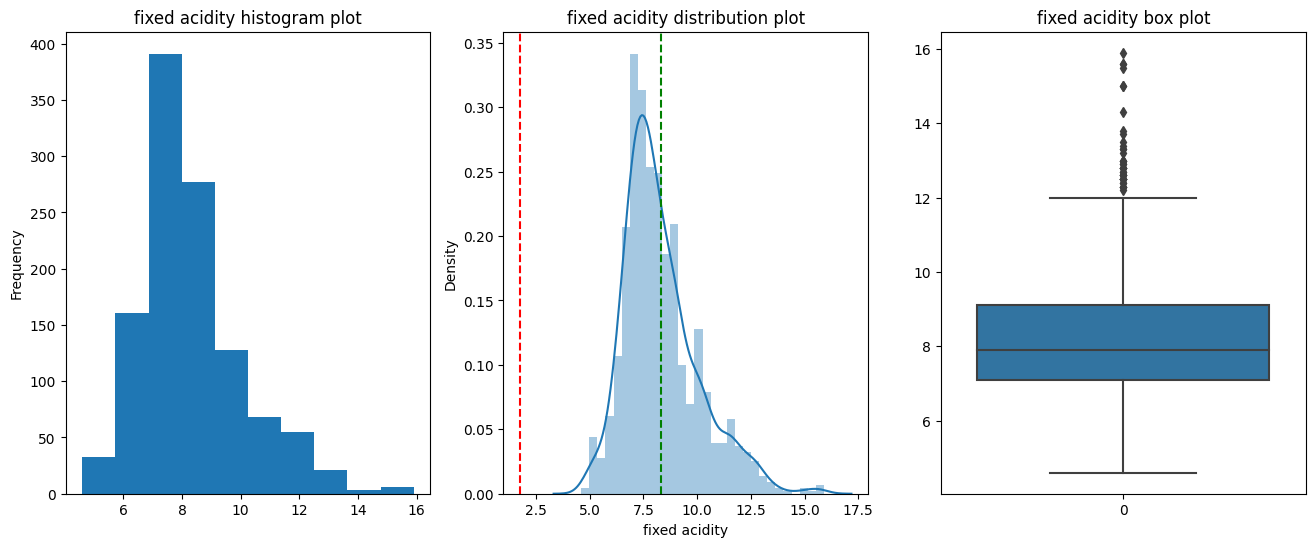

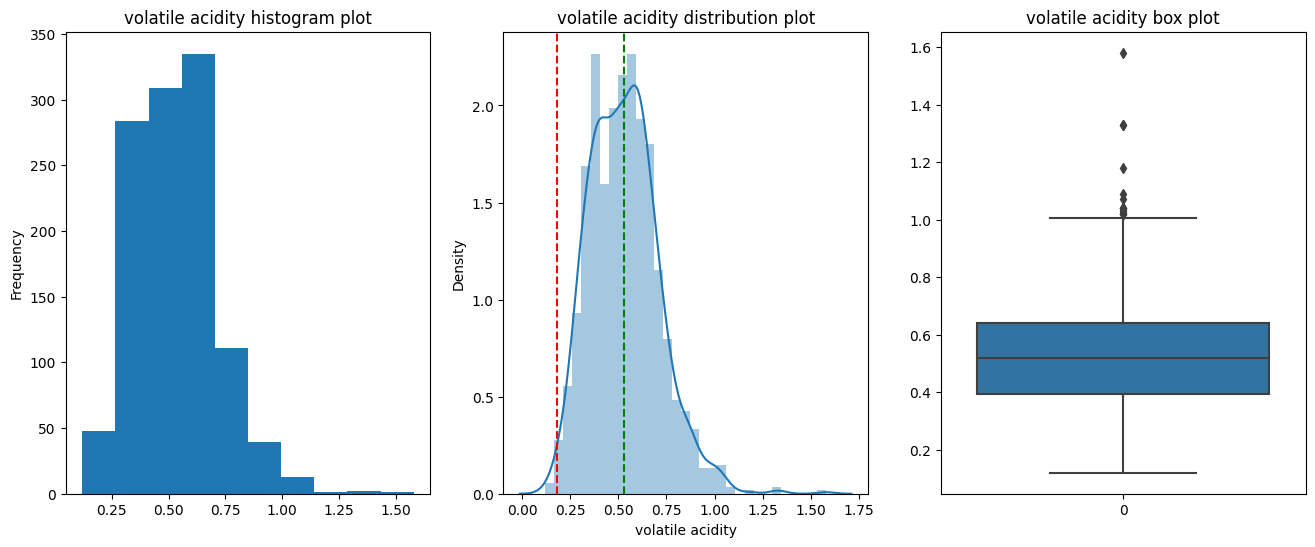

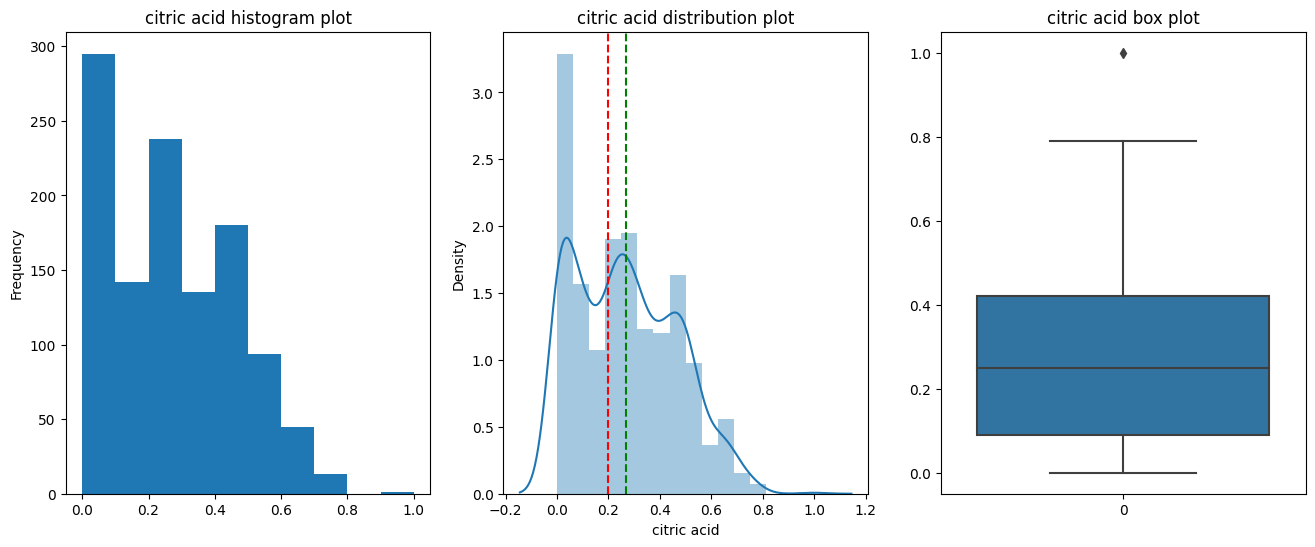

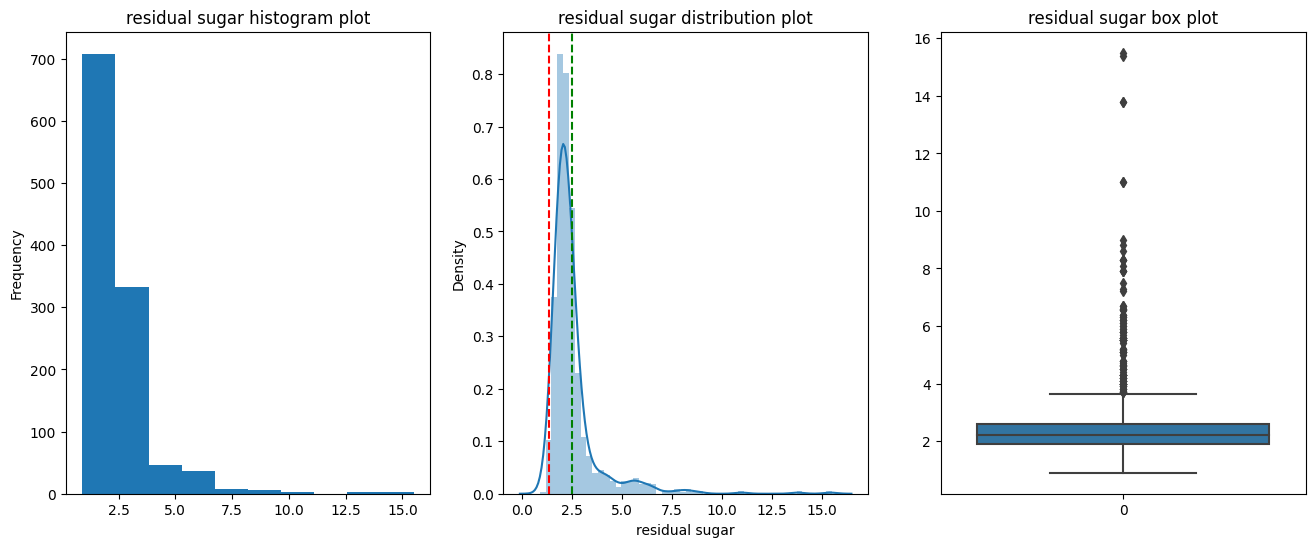

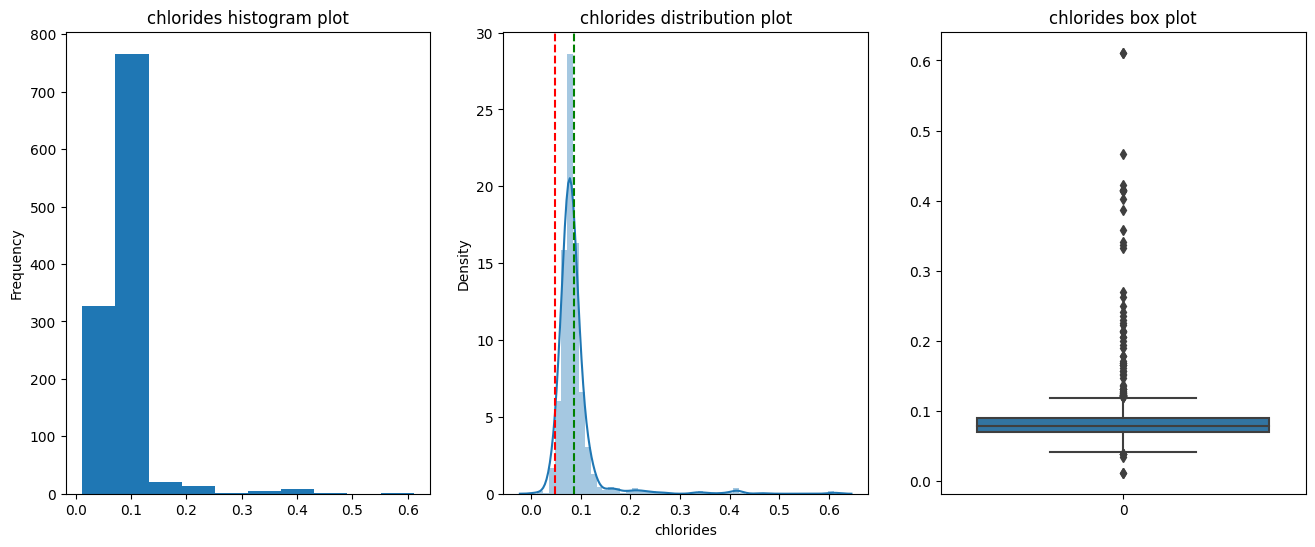

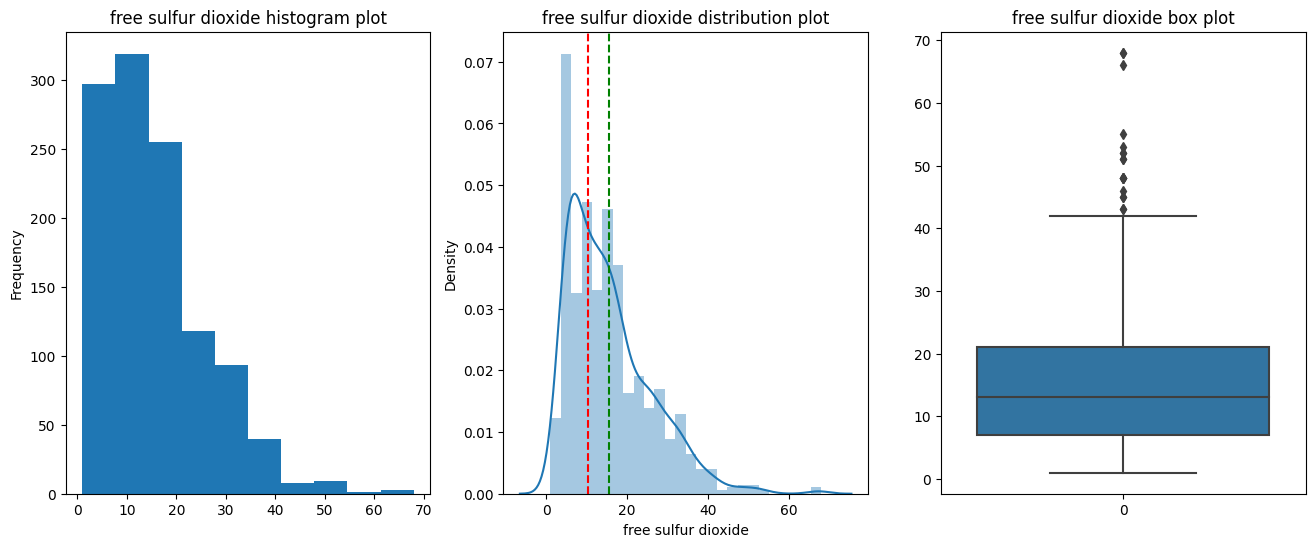

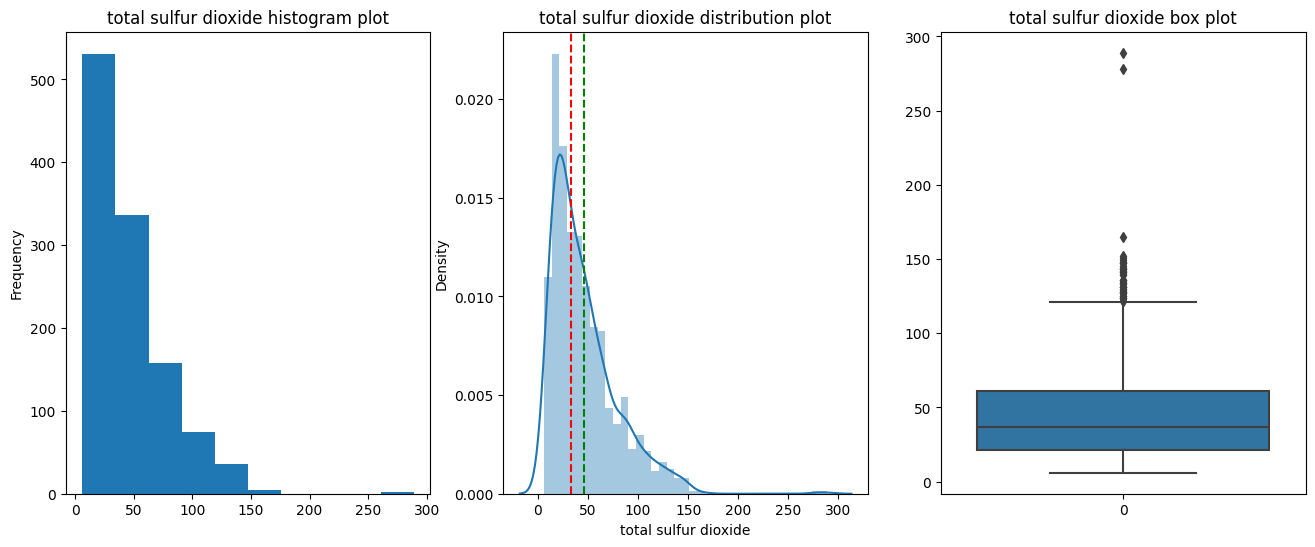

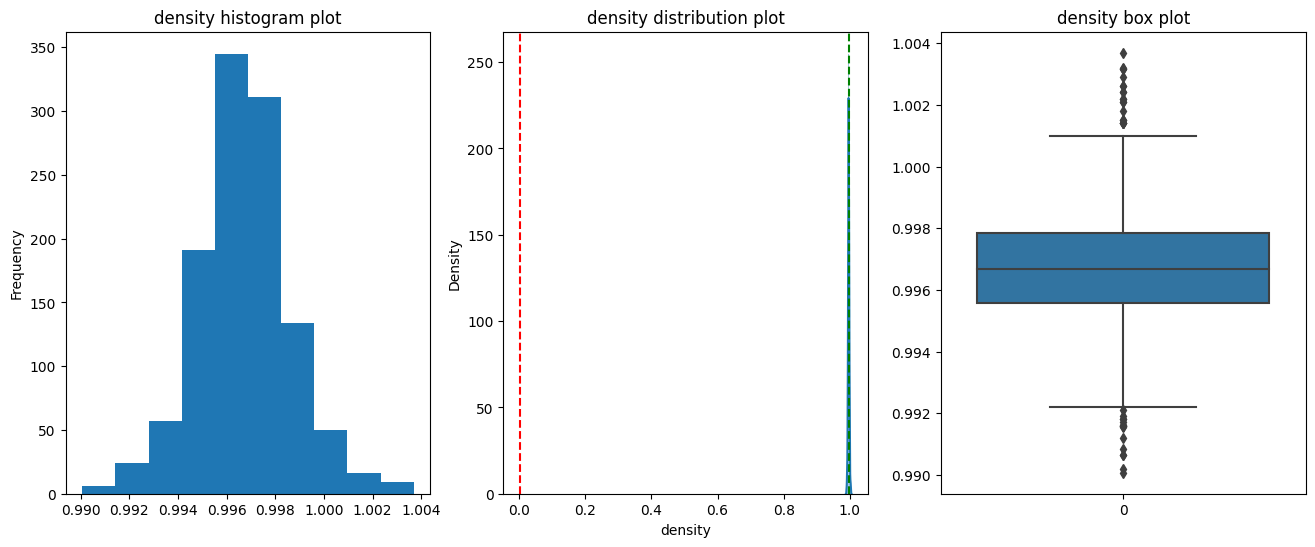

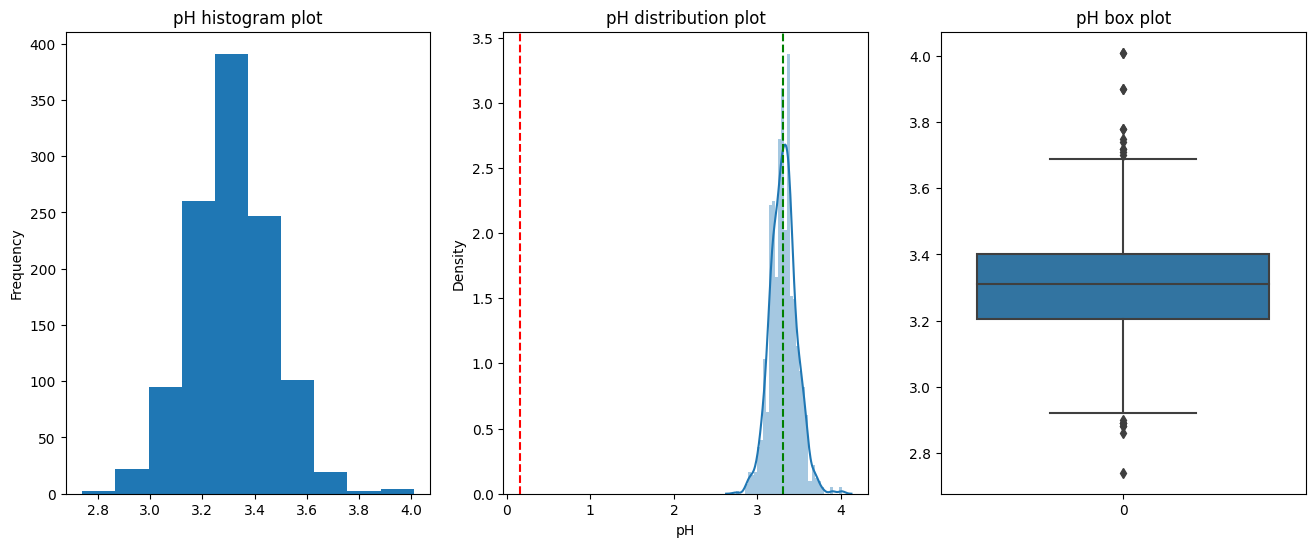

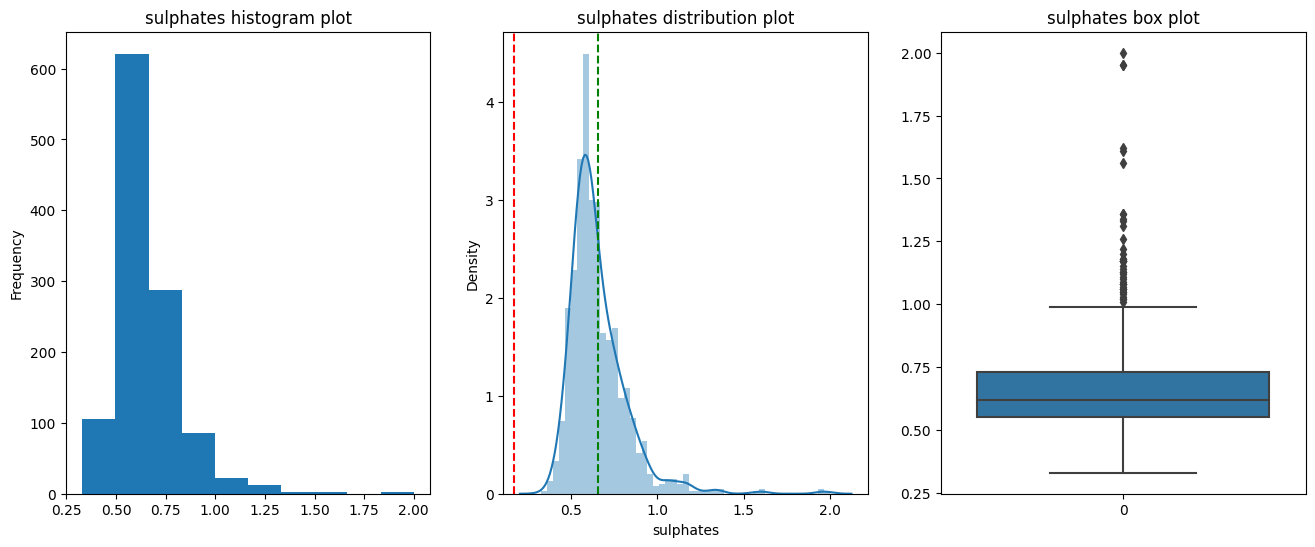

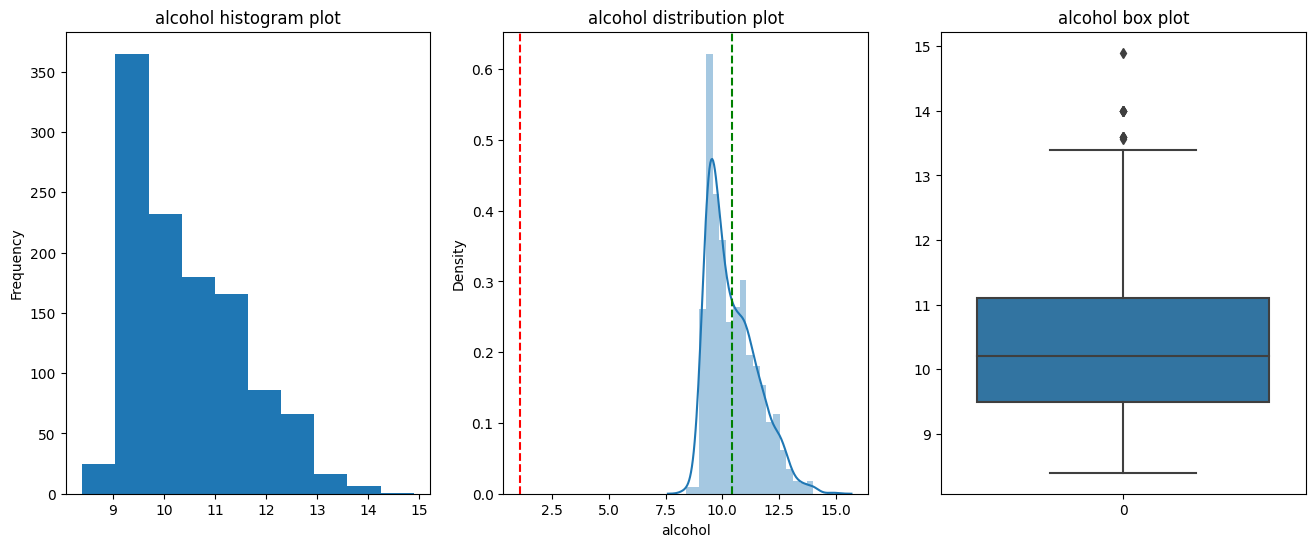

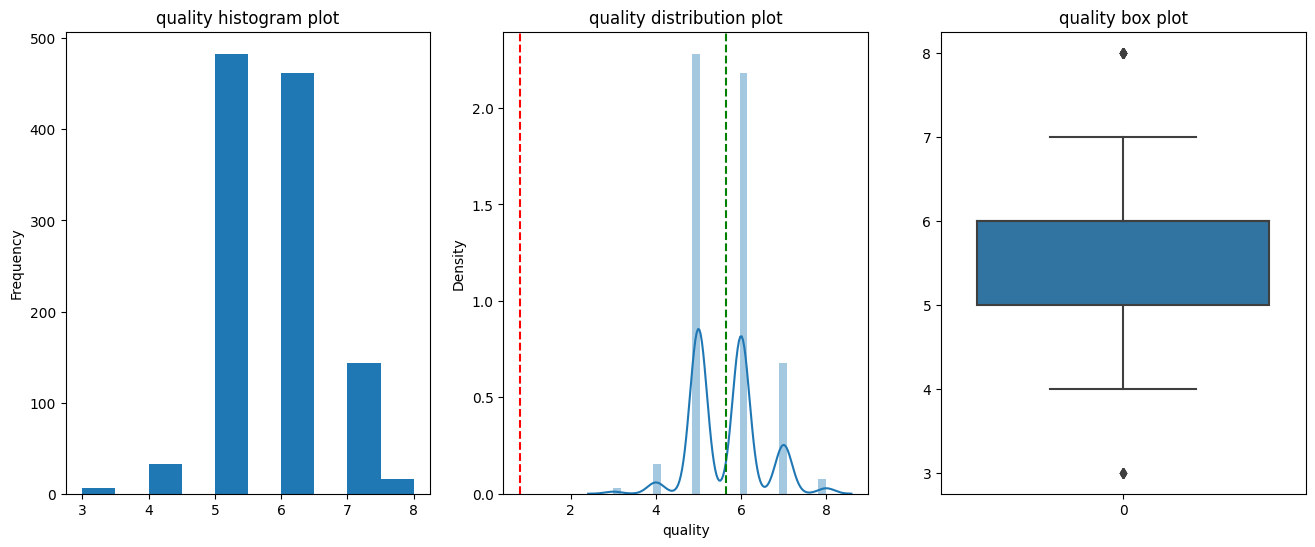

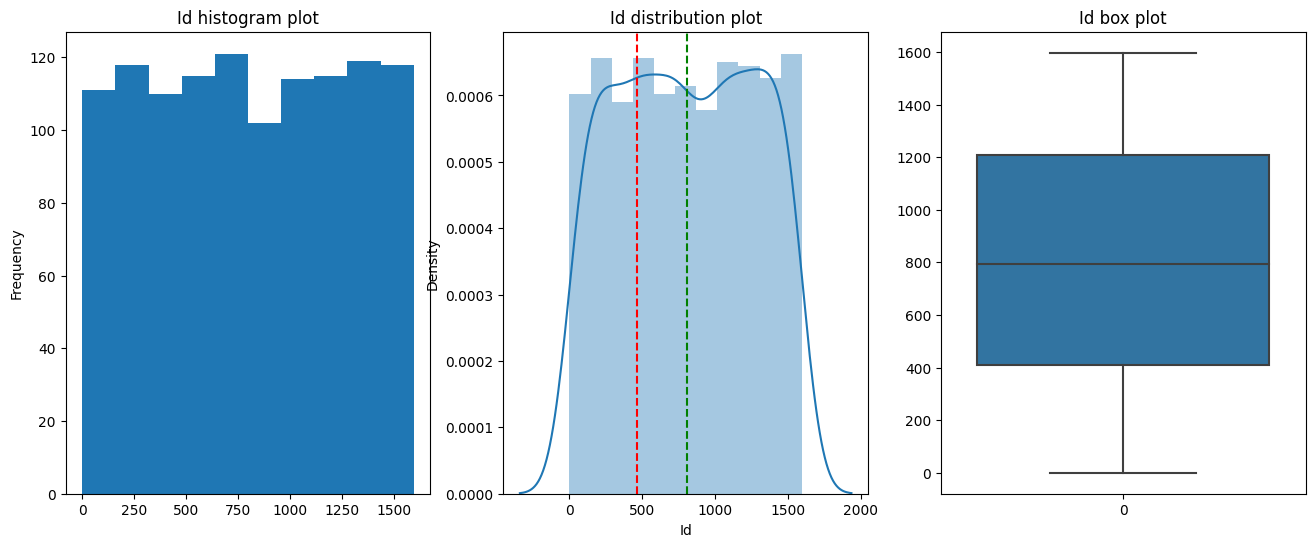

In [52]:
for i in num_feat.columns:
    feat_plot(num_feat[i])

Bivariate Analysis:

Bivariate Analysis is used to find the relationship between two variables. Analysis can be performed for combination of categorical and continuous variables. 
Scatter plot is suitable for analyzing two continuous variables. It indicates the linear or non-linear relationship between the variables.

In [55]:
df

,fixed acidity,volatile acidity,citric acid,residual sugar,chlorides,free sulfur dioxide,total sulfur dioxide,density,pH,sulphates,alcohol,quality,Id
0,7.4,0.700,0.00,1.9,0.076,11.0,34.0,0.99780,3.51,0.56,9.4,5,0
1,7.8,0.880,0.00,2.6,0.098,25.0,67.0,0.99680,3.20,0.68,9.8,5,1
2,7.8,0.760,0.04,2.3,0.092,15.0,54.0,0.99700,3.26,0.65,9.8,5,2
3,11.2,0.280,0.56,1.9,0.075,17.0,60.0,0.99800,3.16,0.58,9.8,6,3
4,7.4,0.700,0.00,1.9,0.076,11.0,34.0,0.99780,3.51,0.56,9.4,5,4
...,...,...,...,...,...,...,...,...,...,...,...,...,...
1138,6.3,0.510,0.13,2.3,0.076,29.0,40.0,0.99574,3.42,0.75,11.0,6,1592
1139,6.8,0.620,0.08,1.9,0.068,28.0,38.0,0.99651,3.42,0.82,9.5,6,1593
1140,6.2,0.600,0.08,2.0,0.090,32.0,44.0,0.99490,3.45,0.58,10.5,5,1594
1141,5.9,0.550,0.10,2.2,0.062,39.0,51.0,0.99512,3.52,0.76,11.2,6,1595


<Axes: xlabel='citric acid', ylabel='residual sugar'>

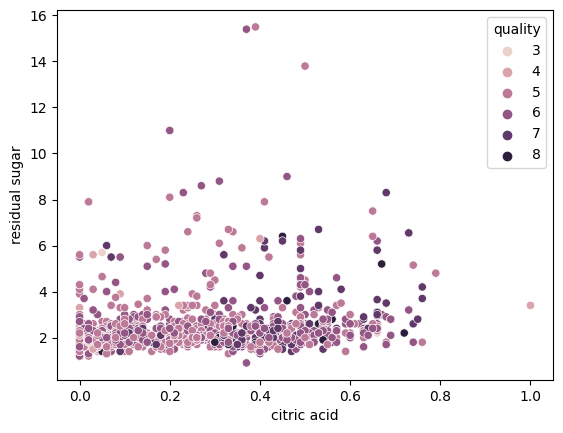

In [54]:
# subsequently the quality variable is explored in a scatter plot

sns.scatterplot(data = df, x = 'citric acid', y= df['residual sugar'], hue = 'quality')

<Axes: xlabel='pH', ylabel='sulphates'>

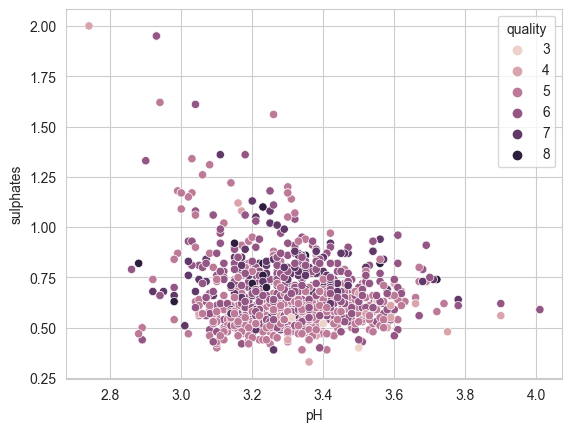

In [57]:
sns.scatterplot(x = df['pH'], y = df['sulphates'], hue = df['quality'])

<Axes: >

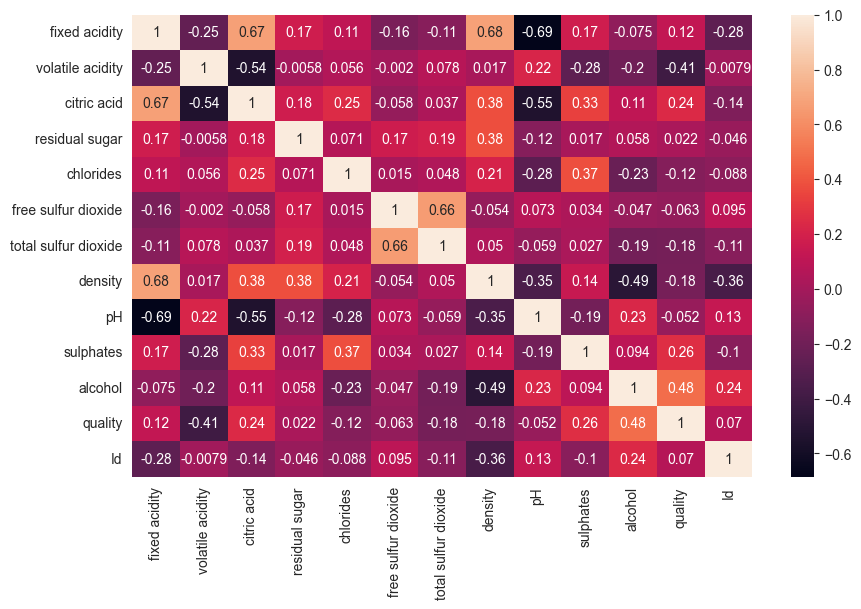

In [58]:
plt.figure(figsize=(10,6))
sns.heatmap(df.corr(), annot=True)

**4. DATA TRANSFORMATION**

Data cleaning, data transformation

In [189]:
df = pd.read_csv("C:\\Users\\diego.mendoza\\Desktop\\WINE\\proyectofinalwine\\WineQT.csv")
df

df.drop('Id', axis = 1, inplace=True)
X = df.drop('quality', axis = 1)
y = df['quality']

In [190]:
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size = 0.2, random_state = 101)

In [176]:
print(f'Shape of the X_train: {X_train.shape}')
print(f'Shape of the X_test: {X_test.shape}')
print(f'Shape of the y_train: {y_train.shape}')
print(f'Shape of the y_test: {y_test.shape}')

Shape of the X_train: (914, 11)
Shape of the X_test: (229, 11)
Shape of the y_train: (914,)
Shape of the y_test: (229,)


In [177]:
class NumericalImputer(BaseEstimator, TransformerMixin):
    """
    Custom scikit-learn transformer to impute missing values in numerical variables.

    Parameters:
        variables (list or str, optional): List of column names (variables) to impute missing values for.
            If a single string is provided, it will be treated as a single variable. Default is None.

    Attributes:
        variables (list): List of column names (variables) to impute missing values for.
        median_dict_ (dict): Dictionary to store the median values for each specified numerical variable during fitting.

    Methods:
        fit(X, y=None):
            Calculates the median values for the specified numerical variables from the training data.
            It returns the transformer instance itself.

        transform(X):
            Imputes missing values in the specified numerical variables using the median values and returns the modified DataFrame.

    Example usage:
    ```
    from sklearn.pipeline import Pipeline

    # Instantiate the custom transformer
    imputer = NumericalImputer(variables=['age', 'income'])

    # Define the pipeline with the custom transformer
    pipeline = Pipeline([
        ('imputer', imputer),
        # Other pipeline steps...
    ])

    # Fit and transform the data using the pipeline
    X_transformed = pipeline.fit_transform(X)
    ```
    """
    def __init__(self, variables=None):
        """
        Initialize the NumericalImputer transformer.

        Parameters:
            variables (list or str, optional): List of column names (variables) to impute missing values for.
                If a single string is provided, it will be treated as a single variable. Default is None.
        """
        self.variables = [variables] if not isinstance(variables, list) else variables

    def fit(self, X, y=None):
        """
        Calculates the median values for the specified numerical variables from the training data.

        Parameters:
            X (pd.DataFrame): Input data to be transformed.

        Returns:
            self (NumericalImputer): The transformer instance.
        """
        self.median_dict = {}
        for var in self.variables:
            self.median_dict[var] = X[var].median()
        return self


    def transform(self, X):
        """
        Imputes missing values in the specified numerical variables using the median values and returns the modified DataFrame.

        Parameters:
            X (pd.DataFrame): Input data to be transformed.

        Returns:
            X_transformed (pd.DataFrame): Transformed DataFrame with missing values imputed for the specified numerical variables.
        """
        X = X.copy()
        for var in self.variables:
            X[var] = X[var].fillna(self.median_dict[var])
        return X


In [178]:
NUMERICAL_VARS_WITH_NA = ['chlorides','free sulfur dioxide']

In [191]:
print(NUMERICAL_VARS_WITH_NA)
median_imputation = NumericalImputer(variables=NUMERICAL_VARS_WITH_NA)
median_imputation.fit(X_train)
X_train = median_imputation.transform(X_train)
X_train

['chlorides', 'free sulfur dioxide']


,fixed acidity,volatile acidity,citric acid,residual sugar,chlorides,free sulfur dioxide,total sulfur dioxide,density,pH,sulphates,alcohol
853,7.2,0.36,0.46,2.1,0.074,24.0,44.0,0.99534,3.40,0.85,11.0
141,11.5,0.30,0.60,2.0,0.067,12.0,27.0,0.99810,3.11,0.97,10.1
111,7.6,0.95,0.03,2.0,0.090,7.0,20.0,0.99590,3.20,0.56,9.6
612,11.7,0.28,0.47,1.7,0.054,17.0,32.0,0.99686,3.15,0.67,10.6
201,8.9,0.40,0.32,5.6,0.087,10.0,47.0,0.99910,3.38,0.77,10.5
...,...,...,...,...,...,...,...,...,...,...,...
575,9.4,0.50,0.34,3.6,0.082,5.0,14.0,0.99870,3.29,0.52,10.7
973,8.7,0.78,0.51,1.7,0.415,12.0,66.0,0.99623,3.00,1.17,9.2
75,7.8,0.41,0.68,1.7,0.467,18.0,69.0,0.99730,3.08,1.31,9.3
599,10.1,0.31,0.35,1.6,0.075,9.0,28.0,0.99672,3.24,0.83,11.2


**MISSING INDICATOR**

In [180]:
class MissingIndicator(BaseEstimator, TransformerMixin):
    """
    Custom scikit-learn transformer to create indicator features for missing values in specified variables.

    Parameters:
        variables (list or str, optional): List of column names (variables) to create indicator features for.
            If a single string is provided, it will be treated as a single variable. Default is None.

    Attributes:
        variables (list): List of column names (variables) to create indicator features for.

    Methods:
        fit(X, y=None):
            This method does not perform any actual training or fitting.
            It returns the transformer instance itself.

        transform(X):
            Creates indicator features for missing values in the specified variables and returns the modified DataFrame.

    Example usage:
    ```
    from sklearn.pipeline import Pipeline

    # Instantiate the custom transformer
    missing_indicator = MissingIndicator(variables=['age', 'income'])

    # Define the pipeline with the custom transformer
    pipeline = Pipeline([
        ('missing_indicator', missing_indicator),
        # Other pipeline steps...
    ])

    # Fit and transform the data using the pipeline
    X_transformed = pipeline.fit_transform(X)
    ```
    """
    def __init__(self, variables=None):
        """
        Initialize the MissingIndicator transformer.

        Parameters:
            variables (list or str, optional): List of column names (variables) to create indicator features for.
                If a single string is provided, it will be treated as a single variable. Default is None.
        """
        if not isinstance(variables, list):
            self.variables = [variables]
        else:
            self.variables = variables

    def fit(self, X, y=None):
        """
        This method does not perform any actual training or fitting, as indicator features are created based on data.
        It returns the transformer instance itself.

        Parameters:
            X (pd.DataFrame): Input data to be transformed. Not used in this method.
            y (pd.Series or np.array, optional): Target variable. Not used in this method.

        Returns:
            self (MissingIndicator): The transformer instance.
        """
        return self

    def transform(self, X):
        """
        Creates indicator features for missing values in the specified variables and returns the modified DataFrame.

        Parameters:
            X (pd.DataFrame): Input data to be transformed.

        Returns:
            X_transformed (pd.DataFrame): Transformed DataFrame with additional indicator features for missing values.
        """
        X = X.copy()
        for var in self.variables:
            X[f'{var}_nan'] = X[var].isnull().astype(int)

        return X


In [192]:
NUMERICAL_VARS = ['fixed acidity','volatile acidity']
create_missing_flag = MissingIndicator(variables=NUMERICAL_VARS)
X_train = create_missing_flag.transform(X_train)
X_train

,fixed acidity,volatile acidity,citric acid,residual sugar,chlorides,free sulfur dioxide,total sulfur dioxide,density,pH,sulphates,alcohol,fixed acidity_nan,volatile acidity_nan
853,7.2,0.36,0.46,2.1,0.074,24.0,44.0,0.99534,3.40,0.85,11.0,0,0
141,11.5,0.30,0.60,2.0,0.067,12.0,27.0,0.99810,3.11,0.97,10.1,0,0
111,7.6,0.95,0.03,2.0,0.090,7.0,20.0,0.99590,3.20,0.56,9.6,0,0
612,11.7,0.28,0.47,1.7,0.054,17.0,32.0,0.99686,3.15,0.67,10.6,0,0
201,8.9,0.40,0.32,5.6,0.087,10.0,47.0,0.99910,3.38,0.77,10.5,0,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...
575,9.4,0.50,0.34,3.6,0.082,5.0,14.0,0.99870,3.29,0.52,10.7,0,0
973,8.7,0.78,0.51,1.7,0.415,12.0,66.0,0.99623,3.00,1.17,9.2,0,0
75,7.8,0.41,0.68,1.7,0.467,18.0,69.0,0.99730,3.08,1.31,9.3,0,0
599,10.1,0.31,0.35,1.6,0.075,9.0,28.0,0.99672,3.24,0.83,11.2,0,0


**PIPELINE**

In [182]:
from sklearn.pipeline import Pipeline

transformations_pipeline = Pipeline(
                              [
                                ('missing_indicator', MissingIndicator(variables=NUMERICAL_VARS)),
                                ('median_imputation', NumericalImputer(variables=NUMERICAL_VARS_WITH_NA))

                              ])

In [183]:
transformations_pipeline

Pipeline(steps=[('missing_indicator',
                 MissingIndicator(variables=['fixed acidity',
                                             'volatile acidity'])),
                ('median_imputation',
                 NumericalImputer(variables=['chlorides',
                                             'free sulfur dioxide']))])

In [184]:
mypipe = Pipeline(steps=[('missing_indicator',MissingIndicator(variables=['fixed acidity','volatile acidity'])),
              ('median_imputation',NumericalImputer(variables=['chlorides','free sulfur dioxide']))])

Pipeline(steps=[('missing_indicator',
                 MissingIndicator(variables=['fixed acidity',
                                             'volatile acidity'])),
                ('median_imputation',
                 NumericalImputer(variables=['chlorides',
                                             'free sulfur dioxide']))])

In [193]:
X_train

,fixed acidity,volatile acidity,citric acid,residual sugar,chlorides,free sulfur dioxide,total sulfur dioxide,density,pH,sulphates,alcohol,fixed acidity_nan,volatile acidity_nan
853,7.2,0.36,0.46,2.1,0.074,24.0,44.0,0.99534,3.40,0.85,11.0,0,0
141,11.5,0.30,0.60,2.0,0.067,12.0,27.0,0.99810,3.11,0.97,10.1,0,0
111,7.6,0.95,0.03,2.0,0.090,7.0,20.0,0.99590,3.20,0.56,9.6,0,0
612,11.7,0.28,0.47,1.7,0.054,17.0,32.0,0.99686,3.15,0.67,10.6,0,0
201,8.9,0.40,0.32,5.6,0.087,10.0,47.0,0.99910,3.38,0.77,10.5,0,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...
575,9.4,0.50,0.34,3.6,0.082,5.0,14.0,0.99870,3.29,0.52,10.7,0,0
973,8.7,0.78,0.51,1.7,0.415,12.0,66.0,0.99623,3.00,1.17,9.2,0,0
75,7.8,0.41,0.68,1.7,0.467,18.0,69.0,0.99730,3.08,1.31,9.3,0,0
599,10.1,0.31,0.35,1.6,0.075,9.0,28.0,0.99672,3.24,0.83,11.2,0,0


In [196]:
X_train = transformations_pipeline.fit_transform(X_train)
X_train

,fixed acidity,volatile acidity,citric acid,residual sugar,chlorides,free sulfur dioxide,total sulfur dioxide,density,pH,sulphates,alcohol,fixed acidity_nan,volatile acidity_nan
853,7.2,0.36,0.46,2.1,0.074,24.0,44.0,0.99534,3.40,0.85,11.0,0,0
141,11.5,0.30,0.60,2.0,0.067,12.0,27.0,0.99810,3.11,0.97,10.1,0,0
111,7.6,0.95,0.03,2.0,0.090,7.0,20.0,0.99590,3.20,0.56,9.6,0,0
612,11.7,0.28,0.47,1.7,0.054,17.0,32.0,0.99686,3.15,0.67,10.6,0,0
201,8.9,0.40,0.32,5.6,0.087,10.0,47.0,0.99910,3.38,0.77,10.5,0,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...
575,9.4,0.50,0.34,3.6,0.082,5.0,14.0,0.99870,3.29,0.52,10.7,0,0
973,8.7,0.78,0.51,1.7,0.415,12.0,66.0,0.99623,3.00,1.17,9.2,0,0
75,7.8,0.41,0.68,1.7,0.467,18.0,69.0,0.99730,3.08,1.31,9.3,0,0
599,10.1,0.31,0.35,1.6,0.075,9.0,28.0,0.99672,3.24,0.83,11.2,0,0


In [197]:
# If the values of the variables nan is equal to 0, we will erase it the variables.

sum_acidity_nan = X_train['fixed acidity_nan'].sum()

if sum_acidity_nan == 0:
    X_train = X_train.drop(columns='fixed acidity_nan')
    
sum_fixed_acidity_nan = X_train['volatile acidity_nan'].sum()

if sum_fixed_acidity_nan == 0:
    X_train = X_train.drop(columns='volatile acidity_nan')

**5. MODEL TRAINING**

Experimentation for model training

In [198]:
def model_evaluation(model, X_train, y_train, X_test, y_test):
    
    print('Starting ...')
    
    ss = StandardScaler()
    X_train_ss = ss.fit_transform(X_train)
    X_test_ss = ss.fit_transform(X_test)
    print("Scaling process is done ...")
    
    print("**********************************")
    
    print("Model building process is started ...")
    mod = model.fit(X_train, y_train)
    mod_pred = model.predict(X_test)
    print("Model creation process is done ...")
    
    print("**********************************")
    print("Evaluation of the Model")
    print("***********************************")
    
    print("Classification report of the Model: \n {}".format(classification_report(y_test, mod_pred)))
    print("Confusion Matrix of the given Model: \n {}".format(confusion_matrix(y_test, mod_pred)))
    print("Accuracy score of the Model: \n{}".format(accuracy_score(y_test, mod_pred)))
    
    print("Evaluation process is done ...")
    
    print("***********************************************")
    
    return mod

In [199]:
rfc = RandomForestClassifier()
model_evaluation(rfc, X_train, y_train, X_test, y_test)

Starting ...
Scaling process is done ...
**********************************
Model building process is started ...
Model creation process is done ...
**********************************
Evaluation of the Model
***********************************
Classification report of the Model: 
               precision    recall  f1-score   support

           3       0.00      0.00      0.00         1
           4       0.00      0.00      0.00         6
           5       0.77      0.77      0.77       102
           6       0.65      0.75      0.69        91
           7       0.63      0.44      0.52        27
           8       0.50      0.50      0.50         2

    accuracy                           0.70       229
   macro avg       0.42      0.41      0.41       229
weighted avg       0.68      0.70      0.68       229

Confusion Matrix of the given Model: 
 [[ 0  0  1  0  0  0]
 [ 0  0  5  1  0  0]
 [ 0  0 79 23  0  0]
 [ 0  0 16 68  6  1]
 [ 0  0  2 13 12  0]
 [ 0  0  0  0  1  1]]
Accuracy 

RandomForestClassifier()

In [200]:
dtc = DecisionTreeClassifier()
model_evaluation(dtc, X_train, y_train, X_test, y_test)

Starting ...
Scaling process is done ...
**********************************
Model building process is started ...
Model creation process is done ...
**********************************
Evaluation of the Model
***********************************
Classification report of the Model: 
               precision    recall  f1-score   support

           3       0.00      0.00      0.00         1
           4       0.00      0.00      0.00         6
           5       0.69      0.72      0.70       102
           6       0.54      0.52      0.53        91
           7       0.56      0.56      0.56        27
           8       0.14      0.50      0.22         2

    accuracy                           0.59       229
   macro avg       0.32      0.38      0.33       229
weighted avg       0.59      0.59      0.59       229

Confusion Matrix of the given Model: 
 [[ 0  0  1  0  0  0]
 [ 0  0  3  3  0  0]
 [ 0  0 73 28  1  0]
 [ 0  2 26 47 10  6]
 [ 0  0  3  9 15  0]
 [ 0  0  0  0  1  1]]
Accuracy 

DecisionTreeClassifier()

In [ ]:
svc = SVC()
model_evaluation(svc, X_train, y_train, X_test, y_test)

Starting ...
Scaling process is done ...
**********************************
Model building process is started ...
Model creation process is done ...
**********************************
Evaluation of the Model
***********************************
Classification report of the Model: 
               precision    recall  f1-score   support

           3       0.00      0.00      0.00         1
           4       0.00      0.00      0.00         6
           5       0.64      0.42      0.51       102
           6       0.45      0.80      0.58        91
           7       0.00      0.00      0.00        27
           8       0.00      0.00      0.00         2

    accuracy                           0.51       229
   macro avg       0.18      0.20      0.18       229
weighted avg       0.46      0.51      0.46       229

Confusion Matrix of the given Model: 
 [[ 0  0  0  1  0  0]
 [ 0  0  2  4  0  0]
 [ 0  0 43 59  0  0]
 [ 0  0 18 73  0  0]
 [ 0  0  4 23  0  0]
 [ 0  0  0  2  0  0]]
Accuracy 

SVC()

**Conclusion: the random forest has a better precision, that is, a better prediction, therefore we will select this model.**

**6. SAVE MODEL**

Model saving

In [ ]:
import joblib

joblib.dump(mypipe, "random_forest.pkl")

**7. LOAD AND PREDICT DATA**

Load saved model and prediction with new data

In [ ]:
# Sample single input data in dictionary format

# Convert the single input data to a DataFrame
single_input_df = pd.DataFrame([single_input_data])

# Preprocess the single input data using the transformations_pipeline
preprocessed_single_input = transformations_pipeline.transform(single_input_df)

# Load the model using joblib
trained_model = joblib.load(save_path)

# Predict the target value using the loaded model
predicted_value = trained_model.predict(preprocessed_single_input)

print(predicted_value)